In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [2]:
chei = 129
cwid = 65
x = np.linspace(0.0, 3.467, cwid+1)
y = np.linspace(-0.95, -7.05, chei+1)

In [3]:
xx,yy = np.meshgrid(x,y)
X = np.vstack((xx.flatten(), yy.flatten())).T
X.shape

(8580, 2)

In [4]:
# Set vertical scale to 0.25 for the channels facies and 0.2 for the background till facies.
kernel = 1.0 * RBF(length_scale=[1.0,0.2]) #, length_scale_bounds=[(1e-1, 10.0),(1e-1,10.0)])
#kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))

In [5]:
gp = GaussianProcessRegressor(kernel=kernel)

In [6]:
y_mean, y_cov = gp.predict(X, return_cov=True)

In [ ]:
y_samples = gp.sample_y(X, 1, random_state=5478)

In [ ]:
y_samples.shape

In [ ]:
fig,ax = plt.subplots()

dx = (x[1]-x[0])/2.
dy = (y[1]-y[0])/2.
extent = [x[0]-dx, x[-1]+dx, y[0]-dy, y[-1]+dy]
ax.imshow(y_samples[:,0].reshape(chei+1,cwid+1), extent=extent)
#fig,ax = plt.subplots()
#ax.pcolormesh(xx,yy,y_samples[:,0].reshape(chei+1,cwid+1))
#ax.axis('equal')

In [ ]:
keigvals, keigvecs = np.linalg.eig(y_cov)

In [ ]:
keigvecs = np.real(keigvecs)
keigvals = np.real(keigvals)

In [ ]:
plt.plot(keigvals[:200])

In [ ]:
nc = 150
zs = (1/np.sqrt(keigvals[:nc]).reshape(-1,1)*keigvecs[:,:nc].T)@y_samples
zs.shape

In [ ]:
plt.hist(zs)

In [ ]:
# Use the first nc eigenvectors
recon = (np.sqrt(keigvals[:nc])*zs[:nc,0]).T@keigvecs[:,:nc].T
stnorm = np.random.randn(8580)
generated = (np.sqrt(keigvals[:nc])*stnorm[:nc]).T@keigvecs[:,:nc].T

In [ ]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(recon.reshape(chei+1,cwid+1))
ax[1].imshow(generated.reshape(chei+1,cwid+1))

In [ ]:
Ki = kernel.__call__(X)

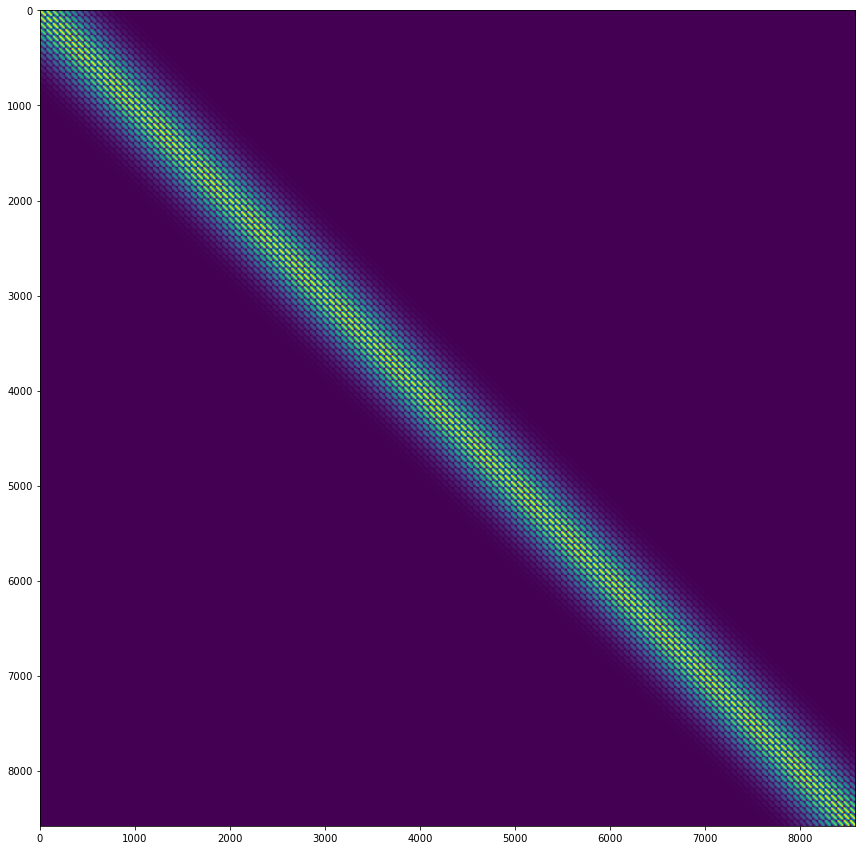

In [32]:
fig,ax = plt.subplots(figsize=(15,15))
plt.imshow(Ki[:,:])

In [33]:
# Save eigenvalues and eigenvectors:
np.save('keigvalsh1v02.npy', keigvals)
np.save('keigvecsh1v02.npy', keigvecs)